In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# loading dataset
data = pd.read_csv('/content/kidney_dataset.csv')
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
# getting the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [4]:
# handling the target feature values
data.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [5]:
# replacing the ckd\t to ckd
data.classification = data.classification.replace("ckd\t","ckd") 

In [6]:
# replacing ckd with 1 & notckd with 0
data['classification'] = data['classification'].replace(['ckd','notckd'], [1,0])

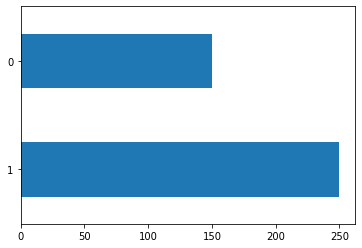

In [7]:
# getting the value count of target
data['classification'].value_counts().plot.barh();

In [8]:
# checking the null values
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
# droping the nulls 
df = data.dropna(axis = 0)
print(f"Before dropping all NaN values: {data.shape}")
print(f"After dropping all NaN values: {df.shape}")

Before dropping all NaN values: (400, 25)
After dropping all NaN values: (158, 25)


In [10]:
# resetting the index
df.index = range(0,len(df),1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [11]:
# rechecking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    object 
 17  rc              158 non-null    obj

In [12]:
# changing the datatype
df['age'] = df['age'].astype(int)
df['pcv'] = df['pcv'].astype(int)
df['wc'] = df['wc'].astype(int)
df['rc'] = df['rc'].astype(float)

<ipython-input-12-bfd6d38143a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)
<ipython-input-12-bfd6d38143a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pcv'] = df['pcv'].astype(int)
<ipython-input-12-bfd6d38143a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [13]:
# checking the features with object datatype
object_dtypes = df.select_dtypes(include = 'object')
object_dtypes.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
1,abnormal,abnormal,present,notpresent,yes,yes,no,poor,no,yes
2,abnormal,abnormal,present,notpresent,yes,yes,no,poor,yes,no
3,normal,abnormal,present,present,yes,yes,yes,poor,yes,no
4,abnormal,abnormal,notpresent,notpresent,yes,yes,yes,poor,yes,yes


In [14]:
# mappings for cat. features
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [15]:
# applying the changes
df = df.replace(dictonary)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
1,53,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29,12100,3.7,1,1,0,0,0,1,1
2,63,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32,4500,3.8,1,1,0,0,1,0,1
3,68,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16,11000,2.6,1,1,1,0,1,0,1
4,61,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24,9200,3.2,1,1,1,0,1,1,1


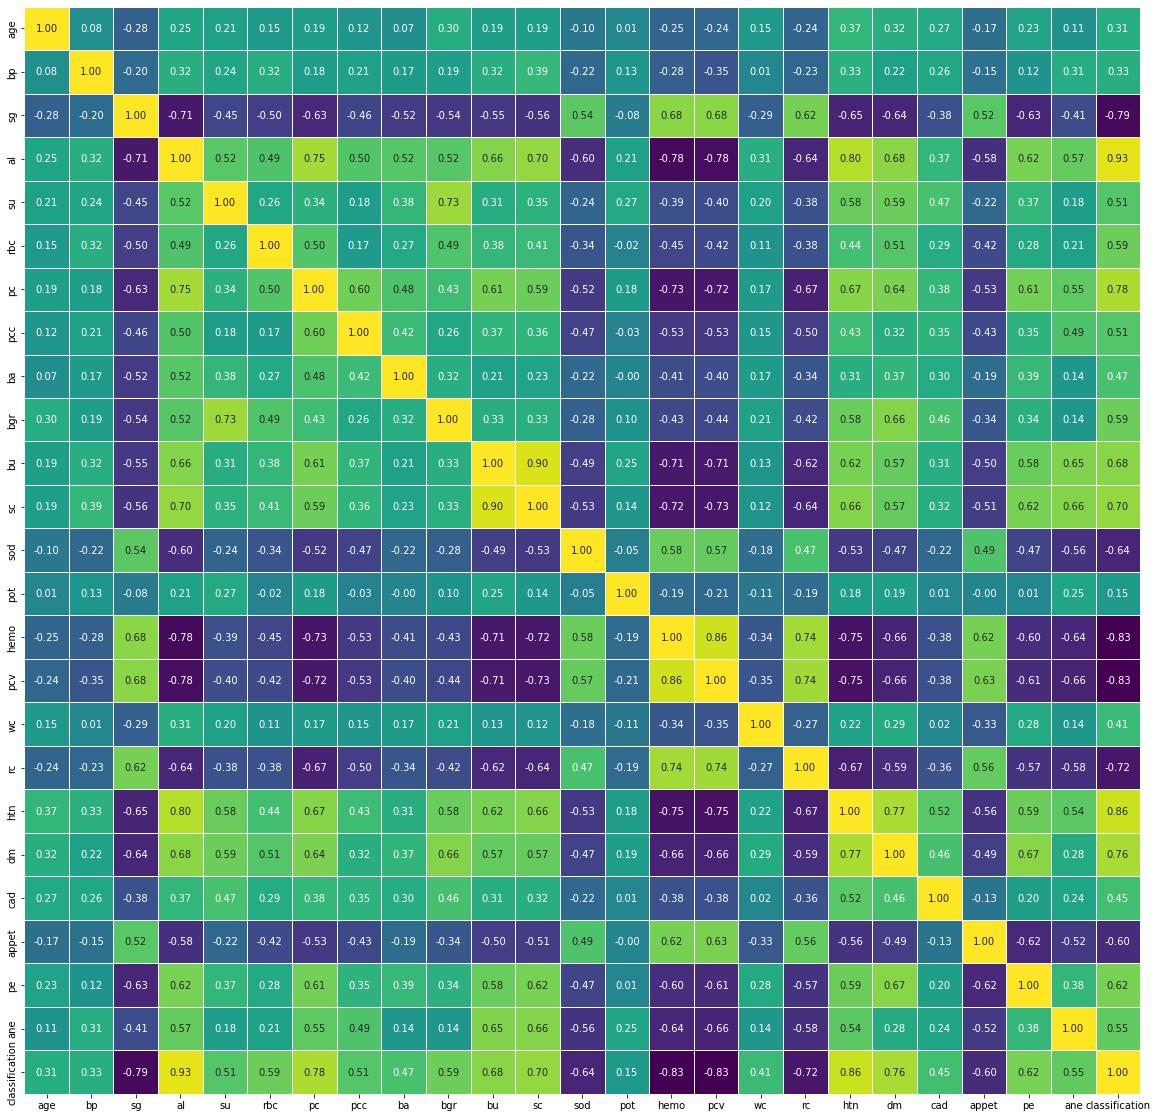

In [16]:
# plotting the correlation
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, cmap='viridis', cbar=False);

In [17]:
# creating X & y
X = df.drop(['classification', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'], axis = 1)
y = df['classification']

In [18]:
# splitting the dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, stratify=y, shuffle=True, random_state=42)

In [19]:
# training a model
model = XGBClassifier(random_state=20)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=20, ...)

In [20]:
# checking the accuracy
print(f"Testing Accuracy: {round(accuracy_score(y_test, model.predict(X_test))*100, 2)}%")

Testing Accuracy: 97.67%


In [21]:
# creating a CM
confusion_matrix(y_test, model.predict(X_test))

array([[31,  0],
       [ 1, 11]])

In [22]:
# printing a clf report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        12

    accuracy                           0.98        43
   macro avg       0.98      0.96      0.97        43
weighted avg       0.98      0.98      0.98        43

